
# <font color=blue>INCOME CENSUS DATA CLASSIFICATION WITH GRADIENT BOOSTING ALGORITHMS</font>


# DATA PREPROCESSING


In [1]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno 


In [2]:
data=pd.read_csv("adult.csv")
df=data.copy() 
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
print("Rows : {} \nColumns : {}".format(df.shape[0],df.shape[1]))

Rows : 48842 
Columns : 15


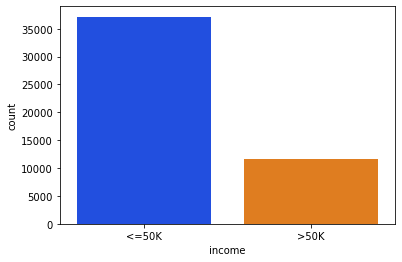

In [4]:
sns.countplot(df["income"],palette="bright")

In [5]:
numeric_describe=df.describe().T 
numeric_describe  

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [6]:
object_describe=df.describe(include=["object"]).T 
object_describe

,count,unique,top,freq
workclass,48842,9,Private,33906
education,48842,16,HS-grad,15784
marital-status,48842,7,Married-civ-spouse,22379
occupation,48842,15,Prof-specialty,6172
relationship,48842,6,Husband,19716
race,48842,5,White,41762
gender,48842,2,Male,32650
native-country,48842,42,United-States,43832
income,48842,2,<=50K,37155


In [7]:
object_columns=df.select_dtypes(include=["object"]).columns 
for i in range(len(object_columns)):
    print("----- {}-----".format(object_columns[i]))
    print(df[object_columns[i]].value_counts()) 

----- workclass-----
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64
----- education-----
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64
----- marital-status-----
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64
----- occupation-----
Prof-special

In [8]:
df.isnull().sum() 

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [9]:
df=df.replace("?",np.nan) 

In [10]:
df.isnull().sum() 

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [11]:
nan_percentage = df.isna().sum() * 100 / len(df)
missing_percentage_df = pd.DataFrame({'column_name': df.columns, 'percent_missing': nan_percentage}).reset_index(drop=True)
missing_percentage_df

,column_name,percent_missing
0,age,0.000000
1,workclass,5.730724
2,fnlwgt,0.000000
3,education,0.000000
4,educational-num,0.000000
5,marital-status,0.000000
6,occupation,5.751198
7,relationship,0.000000
8,race,0.000000
9,gender,0.000000


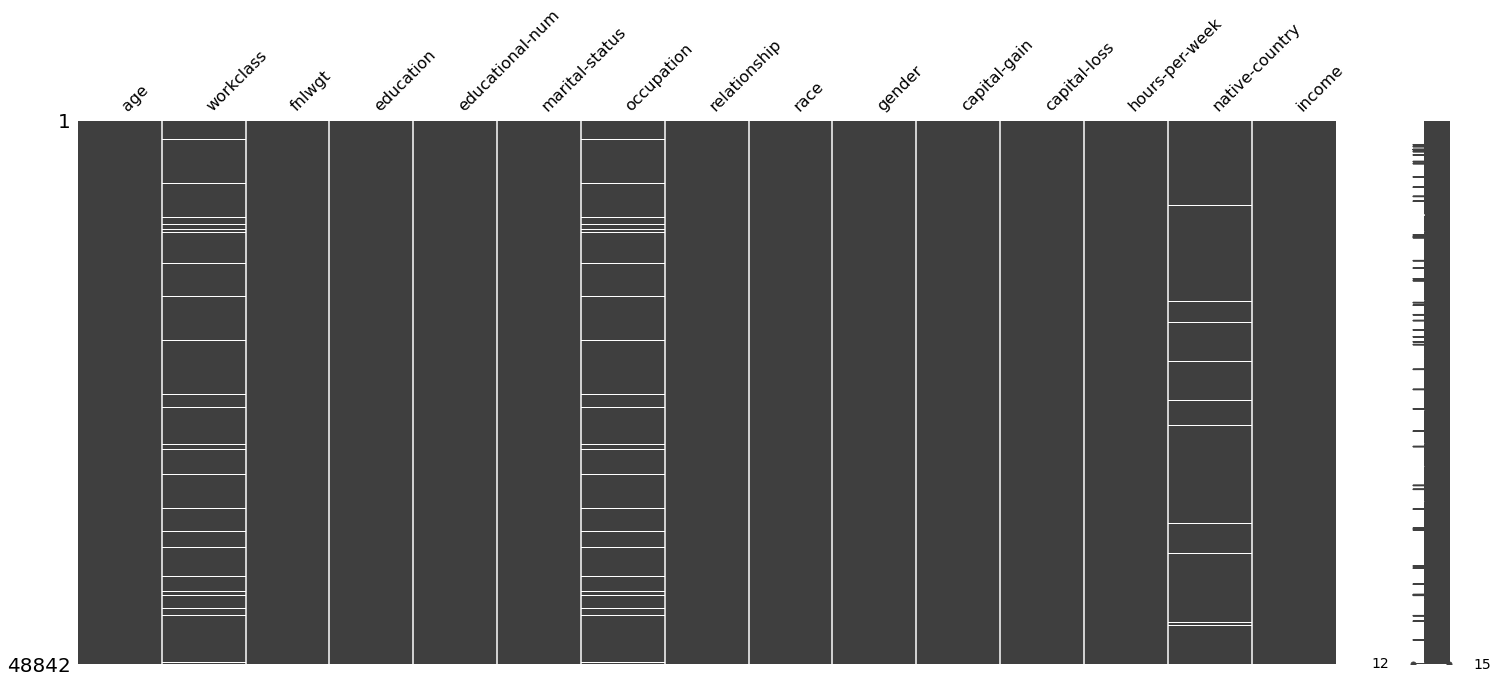

In [12]:
msno.matrix(df) 

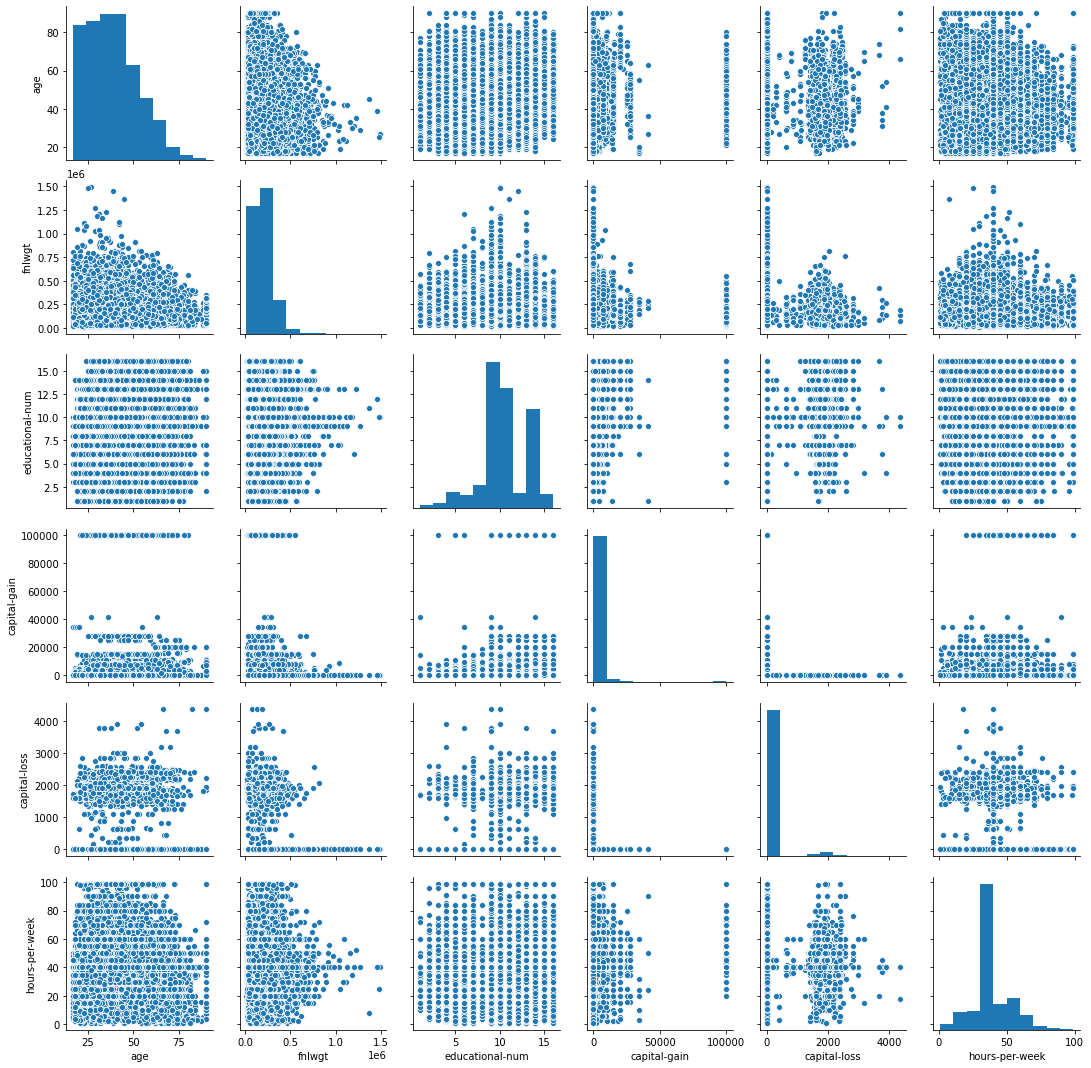

In [13]:
sns.pairplot(df) 

In [14]:
#sns.pairplot(df,hue="income",palette="bright")

In [15]:
df.dtypes 

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [16]:
df["education"].value_counts() 

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [17]:
df["educational-num"].value_counts()

9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: educational-num, dtype: int64

In [18]:
df.drop("education",axis=1,inplace=True) 

In [19]:
df.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [20]:
from pandas.api.types import CategoricalDtype  
df["educational-num"]=df["educational-num"].astype(CategoricalDtype(ordered=True)) 
df["educational-num"].head()

0     7
1     9
2    12
3    10
4    10
Name: educational-num, dtype: category
Categories (16, int64): [1 < 2 < 3 < 4 ... 13 < 14 < 15 < 16]

In [21]:
df["educational-num"].value_counts()

9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: educational-num, dtype: int64

In [22]:
df.dtypes

age                   int64
workclass            object
fnlwgt                int64
educational-num    category
marital-status       object
occupation           object
relationship         object
race                 object
gender               object
capital-gain          int64
capital-loss          int64
hours-per-week        int64
native-country       object
income               object
dtype: object

In [23]:
df.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [24]:
df.corr() 

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.003706,-0.004366,-0.013519
capital-gain,0.077229,-0.003706,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.082157,0.054467,1.000000


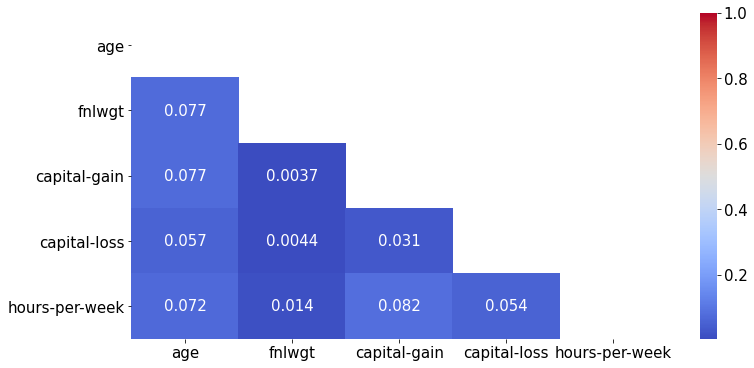

In [25]:
plt.figure(figsize=(12,6))
plt.rcParams.update({'font.size': 15})
corr=df.corr()
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr.abs(),annot=True,cmap="coolwarm",mask=mask) 

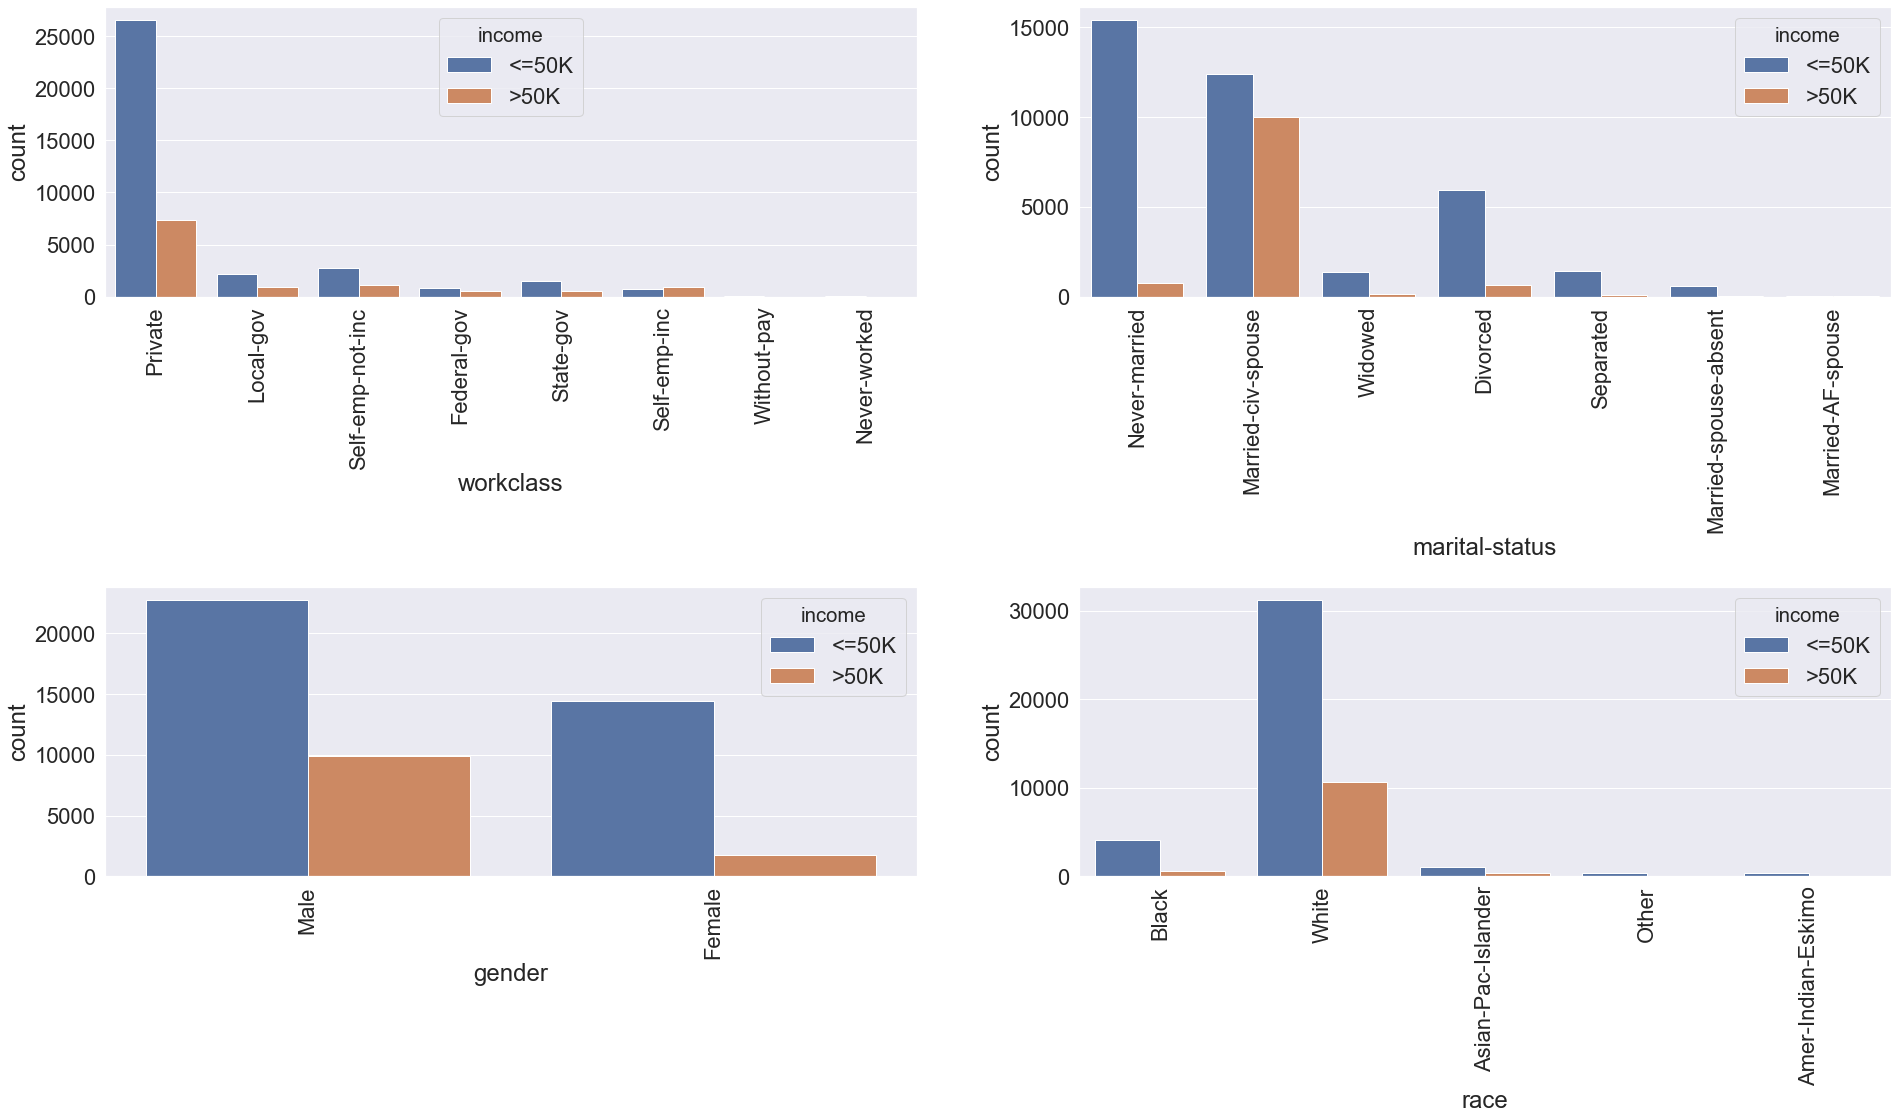

In [26]:
sns.set(font_scale=2)
plt.figure(figsize=(32,16)) 
#plt.rcParams.update({'font.size': 20}) 
plt.subplot(221)
sns.countplot(df["workclass"],hue=df["income"])
plt.xticks(rotation=90) 

plt.subplot(222)
sns.countplot(df["marital-status"],hue=df["income"])
plt.xticks(rotation=90)

plt.subplot(223)
sns.countplot(df["gender"],hue=df["income"])
plt.xticks(rotation=90)

plt.subplot(224)
sns.countplot(df["race"],hue=df["income"])
plt.xticks(rotation=90)

plt.subplots_adjust(hspace=1) 
plt.show()

## HANDLING WITH OUTLIERS

In [27]:
df.skew() 

age                 0.557580
fnlwgt              1.438892
educational-num    -0.316525
capital-gain       11.894659
capital-loss        4.569809
hours-per-week      0.238750
dtype: float64

In [28]:
df.kurtosis() 

age                 -0.184269
fnlwgt               6.057848
educational-num      0.625745
capital-gain       152.693096
capital-loss        20.014346
hours-per-week       2.951059
dtype: float64

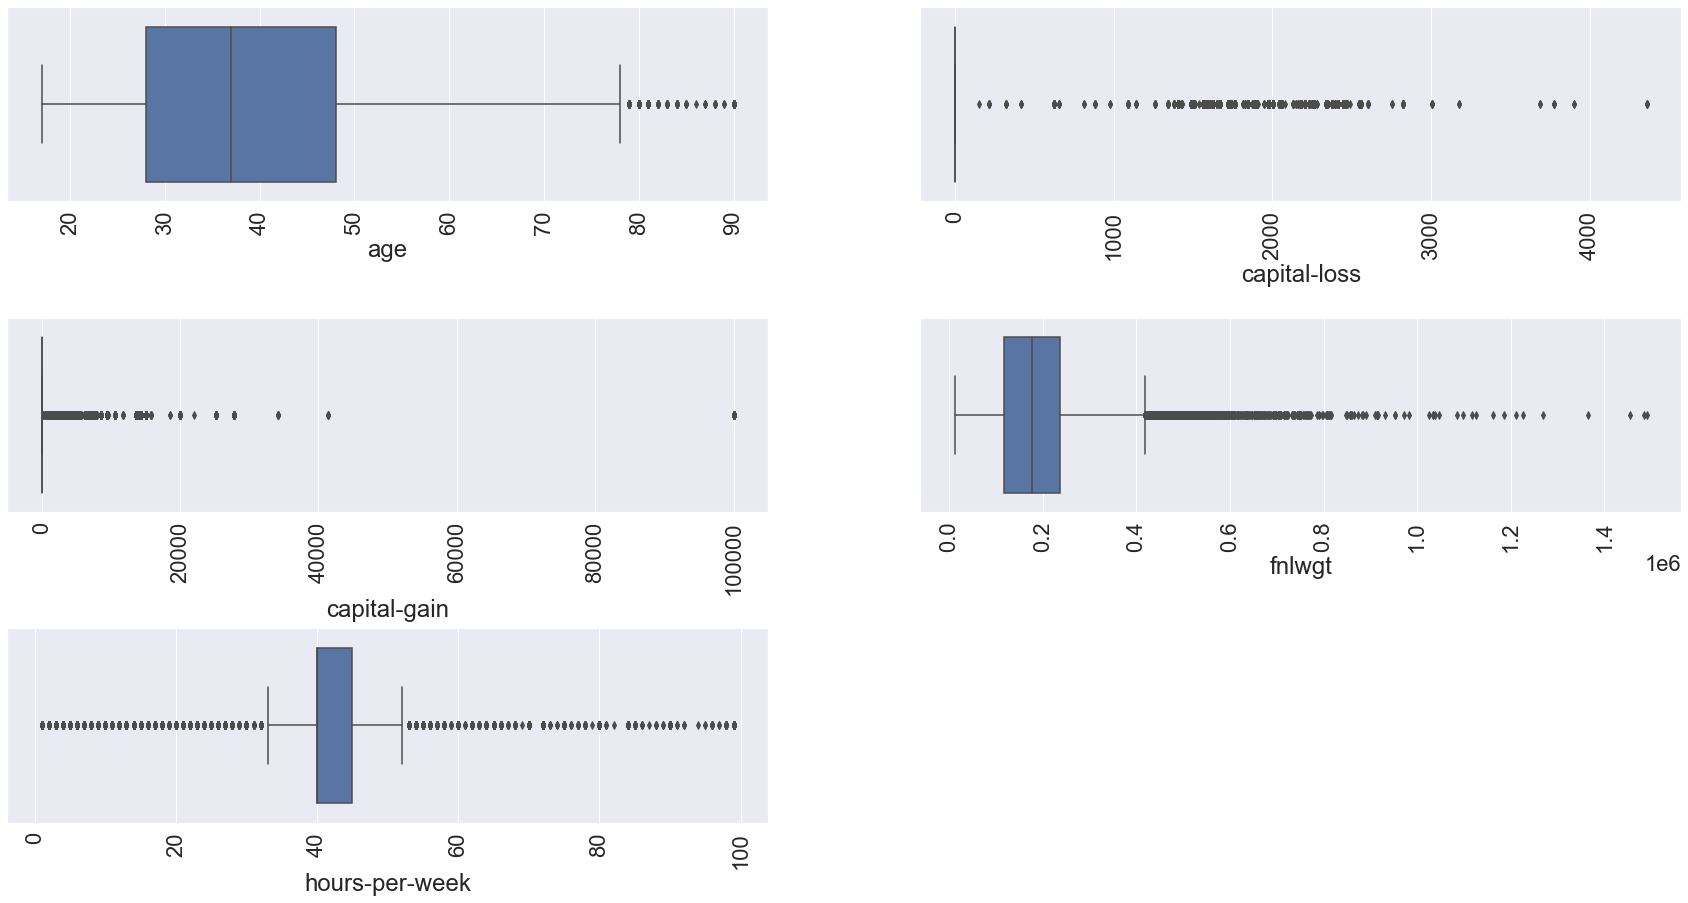

In [29]:

plt.figure(figsize=(30,15))
plt.rcParams.update({'font.size': 20})
plt.subplot(321)
sns.boxplot(df["age"])
plt.xticks(rotation=90) 

plt.subplot(322)
sns.boxplot(df["capital-loss"])
plt.xticks(rotation=90)

plt.subplot(323)
sns.boxplot(df["capital-gain"])
plt.xticks(rotation=90)

plt.subplot(324)
sns.boxplot(df["fnlwgt"])
plt.xticks(rotation=90)

plt.subplot(325)
sns.boxplot(df["hours-per-week"])
plt.xticks(rotation=90)

plt.subplots_adjust(hspace=0.6) 
plt.show()

In [30]:
df_loss_withoutzero=df.loc[df["capital-loss"]!=0,:] 
df_loss_withoutzero.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
52,21,Private,214399,10,Never-married,Other-service,Own-child,White,Female,0,1721,24,United-States,<=50K
82,24,Private,83141,10,Separated,Other-service,Not-in-family,White,Male,0,1876,40,United-States,<=50K
129,41,Private,239296,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,2415,50,United-States,>50K
143,43,Self-emp-inc,214503,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1887,45,United-States,>50K
154,40,State-gov,67874,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,1887,45,United-States,>50K


In [31]:
df_gain_withoutzero=df.loc[df["capital-gain"]!=0,:] 
df_gain_withoutzero.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
7,63,Self-emp-not-inc,104626,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
10,65,Private,184454,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
14,48,Private,279724,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3103,0,48,United-States,>50K
25,45,Self-emp-not-inc,432824,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,90,United-States,>50K


(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.]),
 <a list of 7 Text major ticklabel objects>)

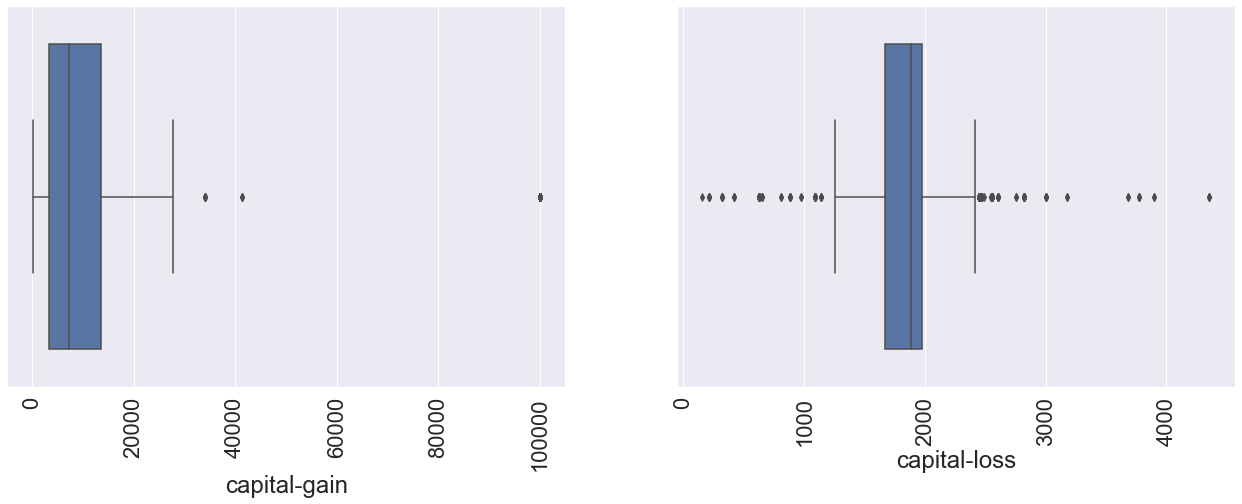

In [32]:

plt.figure(figsize=(22,7))

plt.subplot(121)
sns.boxplot(df_gain_withoutzero["capital-gain"])
plt.xticks(rotation=90) 

plt.subplot(122)
sns.boxplot(df_loss_withoutzero["capital-loss"])
plt.xticks(rotation=90)

In [33]:
numeric_columns=list(df.select_dtypes(include=["int64"]).columns) 
numeric_columns

['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']

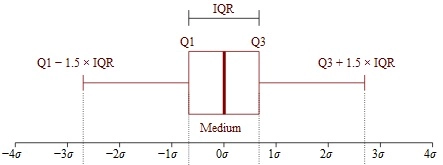


In [34]:
lower_limits=[]
upper_limits=[]
IQR_values=[]

for i in range(len(numeric_columns)):
    
    Q1=df[numeric_columns[i]].quantile(0.25) 
    Q3=df[numeric_columns[i]].quantile(0.75) 
    IQR=Q3-Q1 
    IQR_values.append(IQR)
    lower_limit=Q1-(1.5*IQR) 
    lower_limits.append(lower_limit)
    upper_limit=Q3+1.5*IQR 
    upper_limits.append(upper_limit)

In [35]:
IQR_table=pd.DataFrame({"numeric_columns":numeric_columns,"lower_limits":lower_limits,
                        "upper_limits":upper_limits,"IQR_values":IQR_values})
IQR_table 

,numeric_columns,lower_limits,upper_limits,IQR_values
0,age,-2.00,78.00,20.0
1,fnlwgt,-62586.75,417779.25,120091.5
2,capital-gain,0.00,0.00,0.0
3,capital-loss,0.00,0.00,0.0
4,hours-per-week,32.50,52.50,5.0


In [36]:
Q1_loss=df[df["capital-loss"]!=0]["capital-loss"].quantile(0.25)
Q3_loss=df[df["capital-loss"]!=0]["capital-loss"].quantile(0.75)
IQR_loss=Q3_loss-Q1_loss
lower_limit_loss=Q1_loss-(1.5*IQR_loss)
upper_limit_loss=Q3_loss+(1.5*IQR_loss)

print("Capital-Loss Lower Limit :",lower_limit_loss)
print("Capital-Loss Upper Limit :",upper_limit_loss)

Capital-Loss Lower Limit : 1214.5
Capital-Loss Upper Limit : 2434.5


In [37]:
Q1_gain=df[df["capital-gain"]!=0]["capital-gain"].quantile(0.25)
Q3_gain=df[df["capital-gain"]!=0]["capital-gain"].quantile(0.75)
IQR_gain=Q3_gain-Q1_gain
lower_limit_gain=Q1_gain-(1.5*IQR_gain)
upper_limit_gain=Q3_gain+(1.5*IQR_gain)

print("Capital-Gain için Lower Limit :",lower_limit_gain)
print("Capital-Gain için Upper Limit:",upper_limit_gain)

Capital-Gain için Lower Limit : -11797.5
Capital-Gain için Upper Limit: 28758.5


In [38]:
df_loss_withoutzero[(df_loss_withoutzero["capital-loss"]<lower_limit_loss )|( df_loss_withoutzero["capital-loss"]>upper_limit_loss)]["capital-loss"].shape

(155,)

In [39]:
df_gain_withoutzero[(df_gain_withoutzero["capital-gain"]<lower_limit_gain )|( df_gain_withoutzero["capital-gain"]>upper_limit_gain)]["capital-gain"].shape

(253,)

In [40]:
df_gain_withoutzero["capital-gain"].mode()[0] 

15024

In [41]:
df_loss_withoutzero["capital-loss"].mode()[0]

1902

In [42]:
df[((df["capital-gain"]!=0 )& (df["capital-gain"]<lower_limit_gain )) | ((df["capital-gain"]!=0 )& (df["capital-gain"]>upper_limit_gain ))].head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
83,44,Self-emp-inc,223881,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,50,NaN,>50K
346,39,Private,198654,9,Divorced,Exec-managerial,Unmarried,Black,Female,99999,0,40,United-States,>50K
357,50,Self-emp-not-inc,165001,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,80,United-States,>50K
418,54,Self-emp-inc,159219,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,40,United-States,>50K
692,41,Private,191547,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,United-States,>50K


In [43]:
outlier_gain=((df["capital-gain"]!=0 )& (df["capital-gain"]<lower_limit_gain )) | ((df["capital-gain"]!=0 )& (df["capital-gain"]>upper_limit_gain ))

In [44]:
outlier_loss=((df["capital-loss"]!=0 )& (df["capital-loss"]<lower_limit_loss)) | ((df["capital-loss"]!=0 )& (df["capital-loss"]>upper_limit_loss ))

In [45]:
df.loc[outlier_gain,"capital-gain"]=df_gain_withoutzero["capital-gain"].mode()[0]

In [46]:
df.loc[outlier_loss,"capital-loss"]=df_loss_withoutzero["capital-loss"].mode()[0]

In [47]:
print("outlier number for age: {}".format(df[(df["age"]<(lower_limits[0]))|(df["age"]>(upper_limits[0]))].shape[0]))

outlier number for age: 216


In [48]:
print("outlier number for hours-per-week : {}".format(df[(df["hours-per-week"]<(lower_limits[4]))|(df["hours-per-week"]>(upper_limits[4]))].shape[0]))

outlier number for hours-per-week : 13496


In [49]:
df.drop(df[df["age"]>upper_limits[0]].index,inplace=True) 

In [50]:
df.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [51]:
print("Final Weight Outlier Number :{}".format(df[(df["fnlwgt"]<(lower_limits[1]))|(df["fnlwgt"]>(upper_limits[1]))].shape[0]))

Final Weight Outlier Number :1452


In [52]:
df.drop(df[df["fnlwgt"]>900000].index,inplace=True) 

In [53]:
numeric_describe

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [54]:
numeric_describe_2=df.describe().T

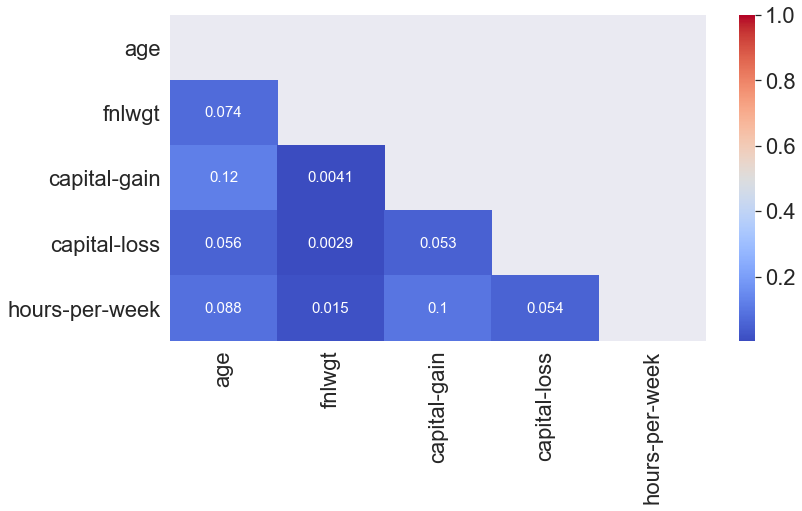

In [55]:
plt.figure(figsize=(12,6))
plt.rcParams.update({'font.size': 15})
corr=df.corr()
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr.abs(),annot=True,cmap="coolwarm",mask=mask) 

## HANDLING WITH MISSING VALUES

In [56]:
df.isnull().sum() 

age                   0
workclass          2747
fnlwgt                0
educational-num       0
marital-status        0
occupation         2757
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      852
income                0
dtype: int64

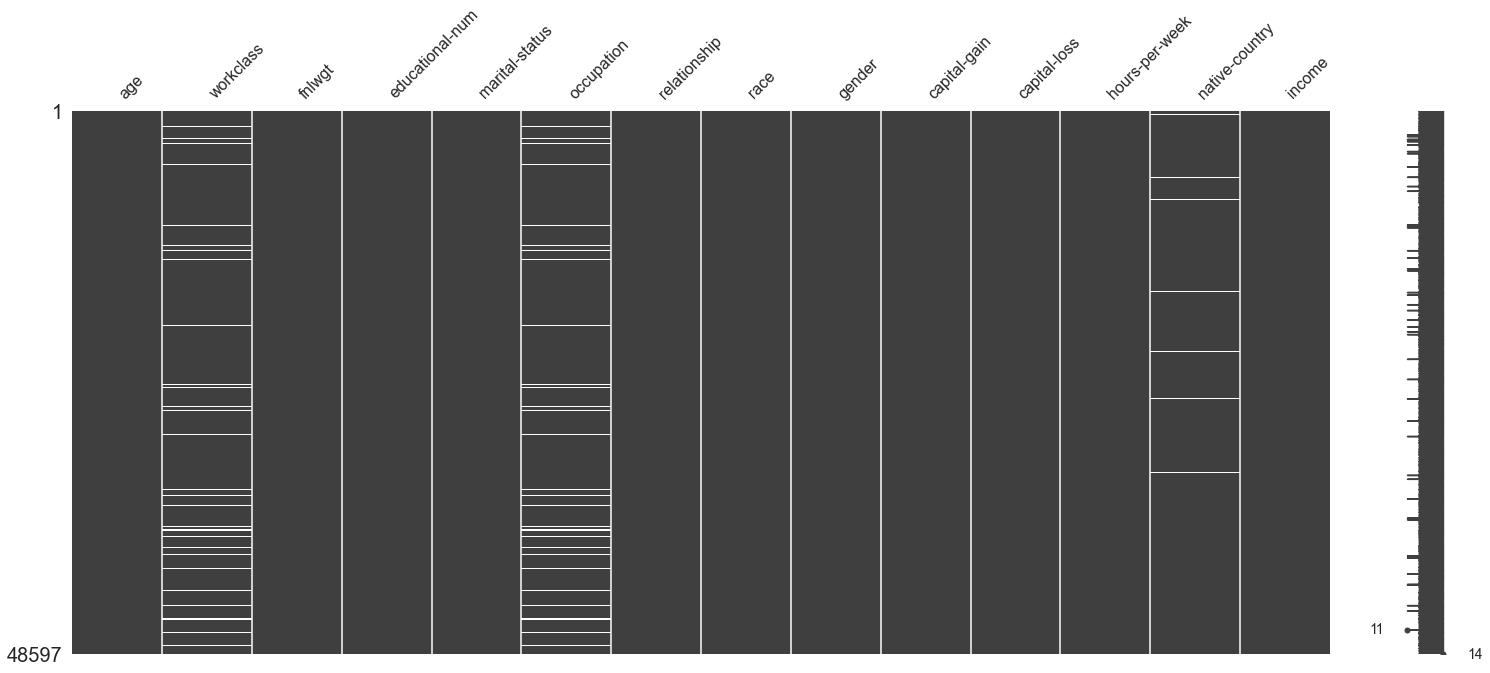

In [57]:
msno.matrix(df)

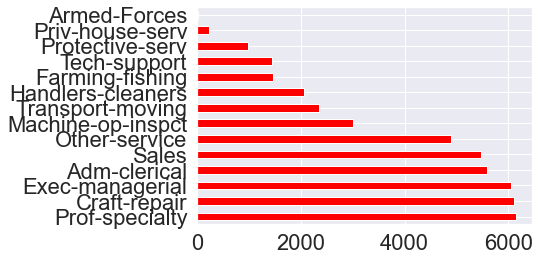

In [58]:
df["occupation"].value_counts().plot.barh(color="red")

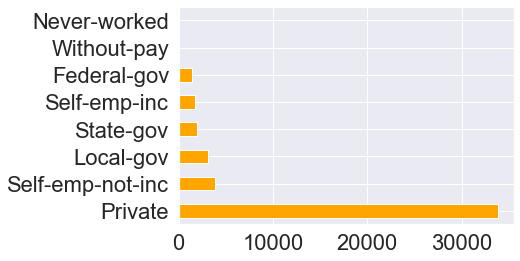

In [59]:
df["workclass"].value_counts().plot.barh(color="orange")

In [60]:
df["native-country"].value_counts()

United-States                 43612
Mexico                          950
Philippines                     293
Germany                         206
Puerto-Rico                     183
Canada                          180
El-Salvador                     154
India                           151
Cuba                            137
England                         125
China                           122
South                           113
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Vietnam                          86
Columbia                         84
Poland                           84
Haiti                            75
Portugal                         66
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           48
Peru                             46
Ecuador                     

In [61]:

for i in ["occupation","workclass","native-country"]:
    df[i].fillna(df[i].mode()[0],inplace=True)


In [62]:
df.isnull().sum().sum() 

0

In [63]:
df["occupation"].value_counts()

Prof-specialty       8902
Craft-repair         6103
Exec-managerial      6049
Adm-clerical         5590
Sales                5476
Other-service        4898
Machine-op-inspct    3016
Transport-moving     2349
Handlers-cleaners    2068
Farming-fishing      1470
Tech-support         1443
Protective-serv       980
Priv-house-serv       238
Armed-Forces           15
Name: occupation, dtype: int64

In [64]:
df["workclass"].value_counts()

Private             36538
Self-emp-not-inc     3824
Local-gov            3122
State-gov            1977
Self-emp-inc         1678
Federal-gov          1427
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [65]:
numeric_describe

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [66]:
numeric_describe_2

,count,mean,std,min,25%,50%,75%,max
age,48597.0,38.446612,13.406983,17.0,28.0,37.0,47.0,78.0
fnlwgt,48597.0,189275.844353,103263.907116,12285.0,117584.0,178282.0,237620.0,889965.0
capital-gain,48597.0,647.987448,2682.840762,0.0,0.0,0.0,0.0,27828.0
capital-loss,48597.0,87.272136,397.264069,0.0,0.0,0.0,0.0,2415.0
hours-per-week,48597.0,40.478322,12.340336,1.0,40.0,40.0,45.0,99.0


## HANDLING WITH CATEGORICAL DATA

In [67]:
df.head()
df_new=df.copy()

In [68]:
df_new=pd.get_dummies(df_new,columns=["gender","income"],drop_first=True) 

In [69]:
df_new.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,gender_Male,income_>50K
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,0,0,40,United-States,1,0
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,0,0,50,United-States,1,0
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,0,0,40,United-States,1,1
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,7688,0,40,United-States,1,1
4,18,Private,103497,10,Never-married,Prof-specialty,Own-child,White,0,0,30,United-States,0,0


In [70]:
df_new.rename({"gender_Male":"gender","income_>50K":"income"},axis=1,inplace=True)


In [71]:
df_new=pd.get_dummies(df_new,columns=["workclass","marital-status","occupation","relationship","race","native-country"])

In [72]:
df_new.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,gender,income,workclass_Federal-gov,workclass_Local-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,30,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [73]:
print("New Column Number :",df_new.shape[1])

New Column Number : 89


In [74]:
df_new.columns 


Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'gender', 'income', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tec

In [75]:
df_new.shape

(48597, 89)

## SPLITTING DATA AS TRAIN AND TEST

In [76]:
from sklearn.model_selection import train_test_split 

In [77]:
df_new.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,gender,income,workclass_Federal-gov,workclass_Local-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,30,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [78]:
df_new["income"].value_counts()

0    36953
1    11644
Name: income, dtype: int64

In [79]:
X=df_new.drop(columns=["income"],axis=1)
X["educational-num"]=X["educational-num"].astype("int") 

In [80]:
y=df_new["income"]

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42) 

In [82]:
print("X_train row number :",X_train.shape[0])

X_train row number : 32559


In [83]:
print("X_test row number :",X_test.shape[0])

X_test row number : 16038


In [84]:
print("y_train row number :",y_train.shape[0])

y_train row number : 32559


In [85]:
print("y_test row number :",y_test.shape[0])

y_test row number : 16038


## GRADIENT BOOSTING MODEL

In [86]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report 
from sklearn.metrics import roc_auc_score,roc_curve,f1_score,recall_score,precision_score
from sklearn.metrics import accuracy_score
gbm=GradientBoostingClassifier()
gbm_model=gbm.fit(X_train,y_train)
y_pred=gbm_model.predict(X_test)

print("GBM  Accuracy Score :",accuracy_score(y_test,y_pred))
print("GBM  Train Score:",    gbm_model.score(X_train,y_train))
print("GBM  f1 score:",       f1_score(y_test,y_pred))

gbm_train_score=gbm_model.score(X_train,y_train)
gbm_accuracy_score=accuracy_score(y_test,y_pred)
gbm_f1_score=f1_score(y_test,y_pred)
gbm_recall_score=recall_score(y_test,y_pred)
gbm_precision_score=precision_score(y_test,y_pred)

GBM  Accuracy Score : 0.8633246040653448
GBM  Train Score: 0.8691913142295525
GBM  f1 score: 0.6734207389749702


In [87]:
gbm_recall_score,gbm_precision_score

(0.5814252636995112, 0.8)

In [88]:
gbm_model

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

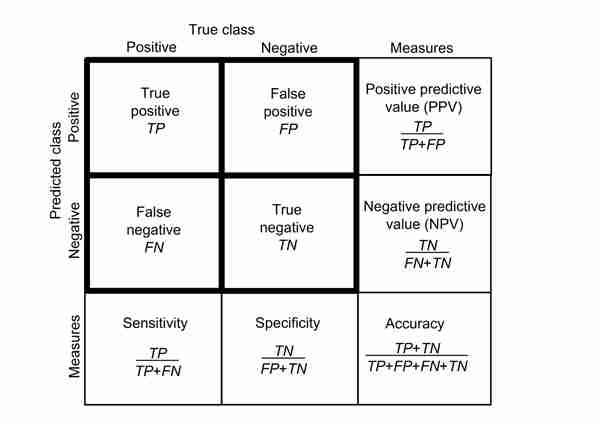

In [89]:
confusion_matrix(y_test,y_pred)

array([[11586,   565],
       [ 1627,  2260]], dtype=int64)

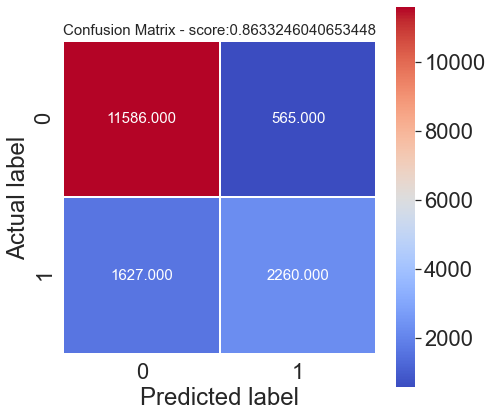

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     12151
           1       0.80      0.58      0.67      3887

    accuracy                           0.86     16038
   macro avg       0.84      0.77      0.79     16038
weighted avg       0.86      0.86      0.86     16038



In [90]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = "coolwarm");
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(classification_report(y_test,y_pred))




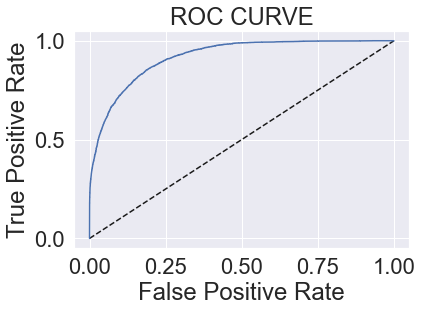

In [91]:
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.plot([0, 1], [0, 1], 'k--')                                                     
plt.plot(fpr_mlp, tpr_mlp)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.show()

## XGBOOST MODEL

In [92]:
 
from xgboost import XGBClassifier

In [93]:

xgb=XGBClassifier(seed=42)
xgb_model=xgb.fit(X_train,y_train)
y_pred=xgb_model.predict(X_test)
print("XGBoost  Accuracy Score :",accuracy_score(y_test,y_pred))
print("XGBoost  Train Score:",xgb_model.score(X_train,y_train))
print("XGBoost  f1 score:",f1_score(y_test,y_pred))

xgb_train_score=xgb_model.score(X_train,y_train)
xgb_accuracy_score=accuracy_score(y_test,y_pred)
xgb_f1_score=f1_score(y_test,y_pred)
xgb_recall_score=recall_score(y_test,y_pred)
xgb_precision_score=precision_score(y_test,y_pred)

XGBoost  Accuracy Score : 0.8626387330091034
XGBoost  Train Score: 0.8675942135814982
XGBoost  f1 score: 0.667972871137905


In [94]:
xgb_model 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1)

In [95]:
confusion_matrix(y_test,y_pred)

array([[11619,   532],
       [ 1671,  2216]], dtype=int64)

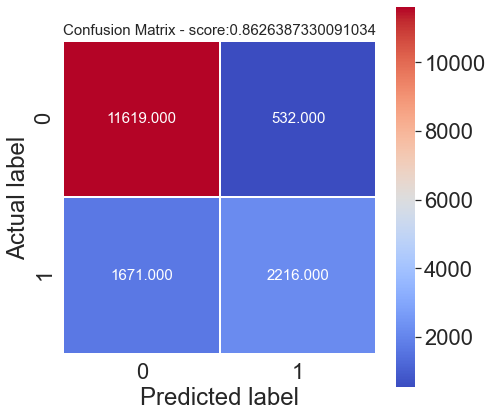

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     12151
           1       0.81      0.57      0.67      3887

    accuracy                           0.86     16038
   macro avg       0.84      0.76      0.79     16038
weighted avg       0.86      0.86      0.85     16038



In [96]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = "coolwarm");
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(classification_report(y_test,y_pred))



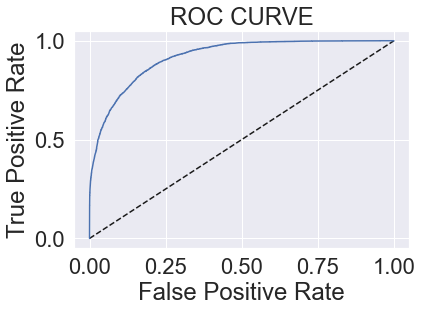

In [97]:
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, xgb.predict_proba(X_test)[:,1])
plt.plot([0, 1], [0, 1], 'k--')                                                     
plt.plot(fpr_mlp, tpr_mlp)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.show()


## HISTOGRAM BASED BOOSTING MODEL

In [98]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
hgb=HistGradientBoostingClassifier(random_state=42,)
hgb_model=hgb.fit(X_train,y_train)
y_pred=hgb_model.predict(X_test)
print("Histogram Based Boosting  Accuracy Score:",accuracy_score(y_test,y_pred))
print("Histogram Based Boosting  Train Score:",hgb_model.score(X_train,y_train))
print("Histogram Based Boosting  f1 score:",f1_score(y_test,y_pred))

hgb_train_score=hgb_model.score(X_train,y_train)
hgb_accuracy_score=accuracy_score(y_test,y_pred)
hgb_f1_score=f1_score(y_test,y_pred)
hgb_recall_score=recall_score(y_test,y_pred)
hgb_precision_score=precision_score(y_test,y_pred)

Histogram Based Boosting  Accuracy Score: 0.8710562414266118
Histogram Based Boosting  Train Score: 0.8865751405141435
Histogram Based Boosting  f1 score: 0.7069991499008218


In [99]:
hgb_model

HistGradientBoostingClassifier(l2_regularization=0.0, learning_rate=0.1,
                               loss='auto', max_bins=256, max_depth=None,
                               max_iter=100, max_leaf_nodes=31,
                               min_samples_leaf=20, n_iter_no_change=None,
                               random_state=42, scoring=None, tol=1e-07,
                               validation_fraction=0.1, verbose=0)

In [100]:
confusion_matrix(y_test,y_pred)

array([[11475,   676],
       [ 1392,  2495]], dtype=int64)

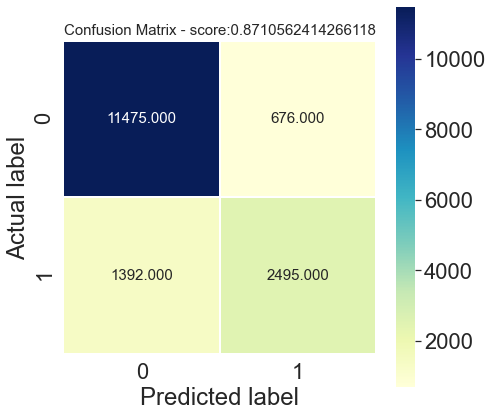

              precision    recall  f1-score   support

           0       0.89      0.94      0.92     12151
           1       0.79      0.64      0.71      3887

    accuracy                           0.87     16038
   macro avg       0.84      0.79      0.81     16038
weighted avg       0.87      0.87      0.87     16038



In [101]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'YlGnBu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(classification_report(y_test,y_pred))



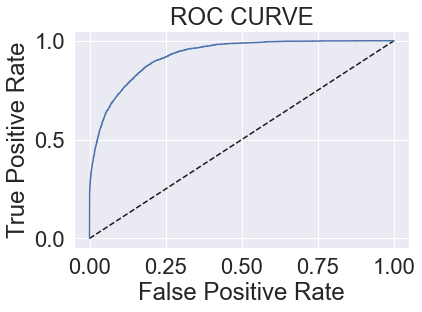

In [102]:
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, hgb.predict_proba(X_test)[:,1])
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_mlp, tpr_mlp)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.show()

## LIGHTGBM MODEL

In [103]:
from lightgbm import LGBMClassifier,plot_importance
lgbm=LGBMClassifier(random_state=42)
lgbm_model=lgbm.fit(X_train,y_train)
y_pred=lgbm_model.predict(X_test)

print("LightGBM için Accuracy Score:",accuracy_score(y_test,y_pred))
print("LightGBM için Train Score:",lgbm_model.score(X_train,y_train))
print("LightGBM için f1 score:",f1_score(y_test,y_pred))

lgbm_train_score=lgbm_model.score(X_train,y_train)
lgbm_accuracy_score=accuracy_score(y_test,y_pred)
lgbm_f1_score=f1_score(y_test,y_pred)
lgbm_recall_score=recall_score(y_test,y_pred)
lgbm_precision_score=precision_score(y_test,y_pred)

LightGBM için Accuracy Score: 0.8701833146277591
LightGBM için Train Score: 0.8852851746060997
LightGBM için f1 score: 0.7038406827880512


In [104]:
lgbm_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [105]:
confusion_matrix(y_test,y_pred)

array([[11482,   669],
       [ 1413,  2474]], dtype=int64)

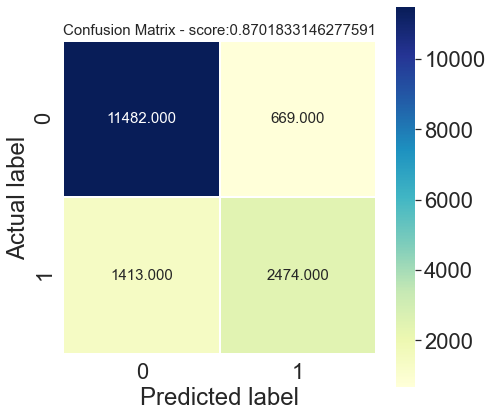

              precision    recall  f1-score   support

           0       0.89      0.94      0.92     12151
           1       0.79      0.64      0.70      3887

    accuracy                           0.87     16038
   macro avg       0.84      0.79      0.81     16038
weighted avg       0.87      0.87      0.87     16038



In [106]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'YlGnBu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(classification_report(y_test,y_pred))


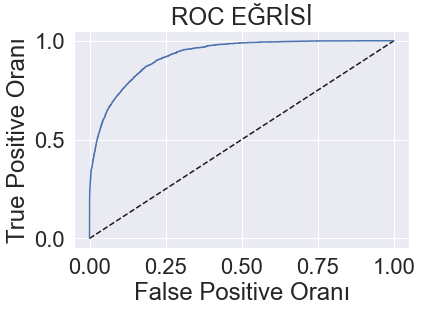

In [107]:
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, lgbm.predict_proba(X_test)[:,1])
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_mlp, tpr_mlp)
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC EĞRİSİ')
plt.show()

## COMPARE THE RESULTS

In [108]:
results=pd.DataFrame({
    "Algorithm":["GBM","XGBoost","HGB","LightGBM"],
    "Accuracy":[gbm_accuracy_score,xgb_accuracy_score,hgb_accuracy_score,lgbm_accuracy_score],
    "Train Score":[gbm_train_score,xgb_train_score,hgb_train_score,lgbm_train_score],
    "f1_Score":[gbm_f1_score,xgb_f1_score,hgb_f1_score,lgbm_f1_score],
     "Recall_Score":[gbm_recall_score,xgb_recall_score,hgb_recall_score,lgbm_recall_score],
      "Precision_Score":[gbm_precision_score,xgb_precision_score,hgb_precision_score,lgbm_precision_score]})

results.sort_values(ascending=False,by="Accuracy")

,Algorithm,Accuracy,Train Score,f1_Score,Recall_Score,Precision_Score
2,HGB,0.871056,0.886575,0.706999,0.641883,0.786818
3,LightGBM,0.870183,0.885285,0.703841,0.636481,0.787146
0,GBM,0.863325,0.869191,0.673421,0.581425,0.800000
1,XGBoost,0.862639,0.867594,0.667973,0.570105,0.806405


## UNDERSAMPLING BECAUSE OF UNBALANCED DATA

In [109]:
random_majority_indices=np.random.choice(df_new[df_new["income"]==0].index,
                                        len(df_new[df_new["income"]==1]),
                                        replace=False)

In [110]:
minority_class_indices=df_new[df_new["income"]==1].index
print(minority_class_indices)

Int64Index([    2,     3,     7,    10,    14,    15,    19,    20,    25,
               30,
            ...
            48811, 48813, 48814, 48817, 48819, 48820, 48826, 48835, 48838,
            48841],
           dtype='int64', length=11644)


In [111]:
under_sample_indices=np.concatenate([minority_class_indices,random_majority_indices])

In [112]:
under_sample=df_new.loc[under_sample_indices]

In [113]:
X=under_sample.drop(columns=["income"],axis=1)
X["educational-num"]=X["educational-num"].astype("int")
y=under_sample["income"]

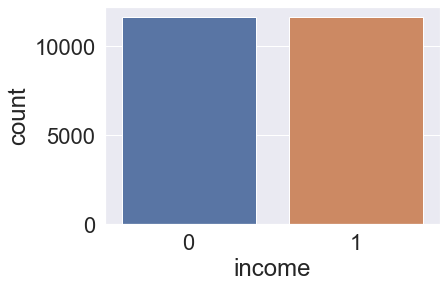

In [114]:
sns.countplot(x="income",data=under_sample)

### GBM MODEL AFTER UNDERSAMPLING

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42) 
gbm=GradientBoostingClassifier()
gbm_model=gbm.fit(X_train,y_train)
y_pred=gbm_model.predict(X_test)

print("GBM  Accuracy Score :",accuracy_score(y_test,y_pred))
print("GBM  Train Score:",    gbm_model.score(X_train,y_train))
print("GBM  f1 score:",       f1_score(y_test,y_pred))

gbm_train_score=gbm_model.score(X_train,y_train)
gbm_accuracy_score=accuracy_score(y_test,y_pred)
gbm_f1_score=f1_score(y_test,y_pred)
gbm_recall_score=recall_score(y_test,y_pred)
gbm_precision_score=precision_score(y_test,y_pred)

GBM  Accuracy Score : 0.8372365339578455
GBM  Train Score: 0.8437379823099602
GBM  f1 score: 0.8419456727732154


### XGBOOST  AFTER UNDERSAMPLING

In [116]:
xgb=XGBClassifier(seed=42)
xgb_model=xgb.fit(X_train,y_train)
y_pred=xgb_model.predict(X_test)
print("XGBoost  Accuracy Score :",accuracy_score(y_test,y_pred))
print("XGBoost  Train Score:",xgb_model.score(X_train,y_train))
print("XGBoost  f1 score:",f1_score(y_test,y_pred))

xgb_train_score=xgb_model.score(X_train,y_train)
xgb_accuracy_score=accuracy_score(y_test,y_pred)
xgb_f1_score=f1_score(y_test,y_pred)
xgb_recall_score=recall_score(y_test,y_pred)
xgb_precision_score=precision_score(y_test,y_pred)

XGBoost  Accuracy Score : 0.8377569607077804
XGBoost  Train Score: 0.8425842840661454
XGBoost  f1 score: 0.8430854410469361


### HGB AFTER UNDERSAMPLING

In [117]:

hgb=HistGradientBoostingClassifier(random_state=42,)
hgb_model=hgb.fit(X_train,y_train)
y_pred=hgb_model.predict(X_test)
print("Histogram Based Boosting  Accuracy Score:",accuracy_score(y_test,y_pred))
print("Histogram Based Boosting  Train Score:",hgb_model.score(X_train,y_train))
print("Histogram Based Boosting  f1 score:",f1_score(y_test,y_pred))

hgb_train_score=hgb_model.score(X_train,y_train)
hgb_accuracy_score=accuracy_score(y_test,y_pred)
hgb_f1_score=f1_score(y_test,y_pred)
hgb_recall_score=recall_score(y_test,y_pred)
hgb_precision_score=precision_score(y_test,y_pred)

Histogram Based Boosting  Accuracy Score: 0.8424408014571949
Histogram Based Boosting  Train Score: 0.8697602871426741
Histogram Based Boosting  f1 score: 0.8465729127074623


### LGBM AFTER UNDERSAMPLING

In [118]:
lgbm=LGBMClassifier(random_state=42)
lgbm_model=lgbm.fit(X_train,y_train)
y_pred=lgbm_model.predict(X_test)

print("LightGBM için Accuracy Score:",accuracy_score(y_test,y_pred))
print("LightGBM için Train Score:",lgbm_model.score(X_train,y_train))
print("LightGBM için f1 score:",f1_score(y_test,y_pred))

lgbm_train_score=lgbm_model.score(X_train,y_train)
lgbm_accuracy_score=accuracy_score(y_test,y_pred)
lgbm_f1_score=f1_score(y_test,y_pred)
lgbm_recall_score=recall_score(y_test,y_pred)
lgbm_precision_score=precision_score(y_test,y_pred)

LightGBM için Accuracy Score: 0.8415300546448088
LightGBM için Train Score: 0.8689911549801308
LightGBM için f1 score: 0.8459787556904401


### RESULTS  AFTER  UNDERSAMPLING

In [119]:
results=pd.DataFrame({
    "Algorithm":["GBM","XGBoost","HGB","LightGBM"],
    "Accuracy":[gbm_accuracy_score,xgb_accuracy_score,hgb_accuracy_score,lgbm_accuracy_score],
    "Train Score":[gbm_train_score,xgb_train_score,hgb_train_score,lgbm_train_score],
    "f1_Score":[gbm_f1_score,xgb_f1_score,hgb_f1_score,lgbm_f1_score],
     "Recall_Score":[gbm_recall_score,xgb_recall_score,hgb_recall_score,lgbm_recall_score],
      "Precision_Score":[gbm_precision_score,xgb_precision_score,hgb_precision_score,lgbm_precision_score]})

results.sort_values(ascending=False,by="Accuracy")

,Algorithm,Accuracy,Train Score,f1_Score,Recall_Score,Precision_Score
2,HGB,0.842441,0.869760,0.846573,0.872780,0.821894
3,LightGBM,0.841530,0.868991,0.845979,0.873824,0.819853
1,XGBoost,0.837757,0.842584,0.843085,0.875131,0.813304
0,GBM,0.837237,0.843738,0.841946,0.870428,0.815268
